In [2]:
import tweepy
import json
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from textblob import TextBlob

analyzer = SentimentIntensityAnalyzer()

# Twitter API Keys
consumer_key = "Ed4RNulN1lp7AbOooHa9STCoU"
consumer_secret = "P7cUJlmJZq0VaCY0Jg7COliwQqzK0qYEyUF9Y0idx4ujb3ZlW5"
access_token = "839621358724198402-dzdOsx2WWHrSuBwyNUiqSEnTivHozAZ"
access_token_secret = "dCZ80uNRbFDjxdU2EckmNiSckdoATach6Q8zb7YYYE5ER"

# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [3]:
# Assign twitter accounts
accounts = ['BBC','CBS','CNN','FoxNews','nytimes']
news = ['BBC','CBS','CNN','Fox','New York Times']
colors = ['lightblue','green','red','blue','yellow']

In [4]:
tweets = {}
compound = {}
overall_compound = {}

for account in accounts:
    
    for x in range(5):
        public_tweets = api.user_timeline(account,page=x)
        for tweet in public_tweets:
            if account in compound:
                compound[account].append(analyzer.polarity_scores(tweet['text'])['compound'])
            else:
                compound[account] = [analyzer.polarity_scores(tweet['text'])['compound']]
    overall_compound[account] = np.mean(compound[account])

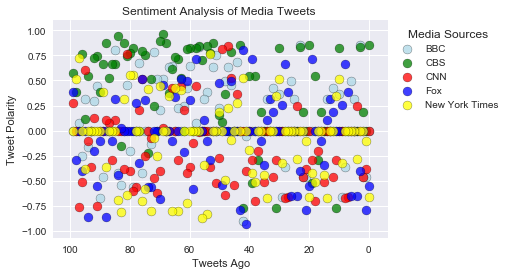

In [7]:
xaxis = range(len(compound[account]))
sns.set()
for x in range(len(accounts)):
    plt.scatter(xaxis,compound[accounts[x]],alpha=0.75,edgecolor='black',facecolor=colors[x],s=80)

plt.legend(news,title='Media Sources',loc='upper left',bbox_to_anchor=(1,1))
plt.title('Sentiment Analysis of Media Tweets ')
plt.ylabel('Tweet Polarity')
plt.xlabel('Tweets Ago')
plt.gca().invert_xaxis()
plt.show()